#耗材记录（减少支出）
Column
设备名称：减少多余名称
重新建立总价

In [ ]:
#need to add heatmap + advise + conclusion

In [2]:
#import libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.style.use('bmh')

import os
os.environ["PYTHONIOENCODING"] = "gb2312"  #ran but the cell output is still the same

In [4]:
#import data

In [5]:
df = pd.read_excel('replaced_items sorted.xlsx')

In [6]:
#describe the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   日期          131 non-null    object 
 2   对应的报修编号     131 non-null    float64
 3   耗材名称        131 non-null    object 
 4   设备名称        131 non-null    object 
 5   所属公司        131 non-null    object 
 6   所属片区        97 non-null     object 
 7   所属项目        131 non-null    object 
 8   更换原因        131 non-null    object 
 9   耗材数量        131 non-null    int64  
 10  单价          131 non-null    float64
 11  总价          131 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 12.4+ KB


In [8]:
#clean data

In [9]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Unnamed: 0, 



In [10]:
#Create columns to count sum of quantity and sum of price 

In [11]:
#create a new dataframe
product_df = df[['日期','对应的报修编号','耗材数量','单价','耗材名称']].copy()

In [12]:
product_df.rename(columns={'日期': 'Date', '对应的报修编号':'Code Name', '耗材数量':'Quantity','单价':'Unit Price', '耗材名称':'Unit Name' }, inplace=True)

In [13]:
# Group by 'Unit Name' column and perform aggregation to create the sum of quantity
product = (product_df.groupby(product_df['Unit Name'].ne(product_df['Unit Name'].shift()).cumsum(), as_index=False)
           .agg({'Code Name': 'first', 'Unit Name': 'first', 'Quantity': 'sum', 'Unit Price': 'first'})
          )

In [14]:
#create a sum price column
product['sum_price']= product['Unit Price']*product['Quantity']

In [15]:
product.head()

,Code Name,Unit Name,Quantity,Unit Price,sum_price
0,2.023110e+21,R型弹簧插销 D2x40,4,1.18,4.72
1,2.023110e+21,V型带 3V-450,1,66.18,66.18
2,2.023112e+21,前车轮,7,638.18,4467.26
3,2.023102e+21,前轮隔套 D32xD25x37.3MM,3,18.91,56.73
4,2.023101e+21,十字开关 D22,1,159.55,159.55


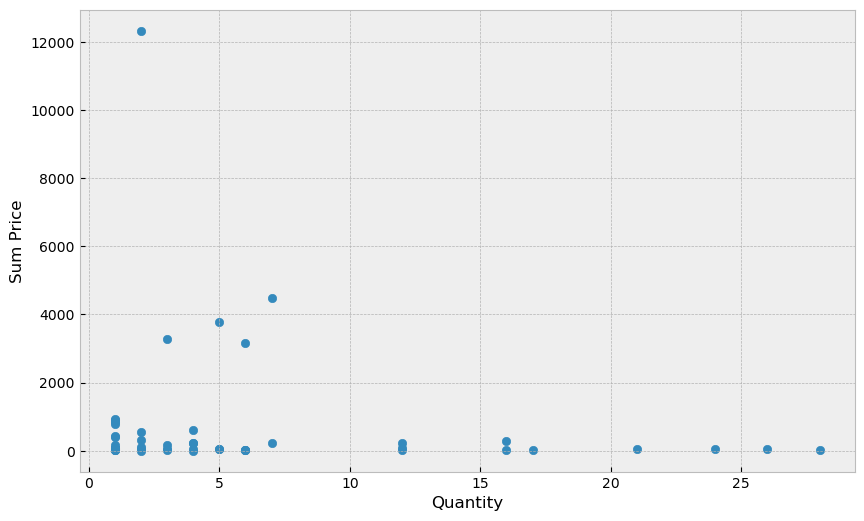

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(product['Quantity'], product['sum_price'])
plt.xlabel('Quantity')
plt.ylabel('Sum Price')
plt.show()

/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31783 (\N{CJK UNIFIED IDEOGRAPH-7C27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25554 (\N{CJK UNIFIED IDEOGRAPH-63D2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21387 (\N{CJK UNIFIED IDEOGRAPH-5

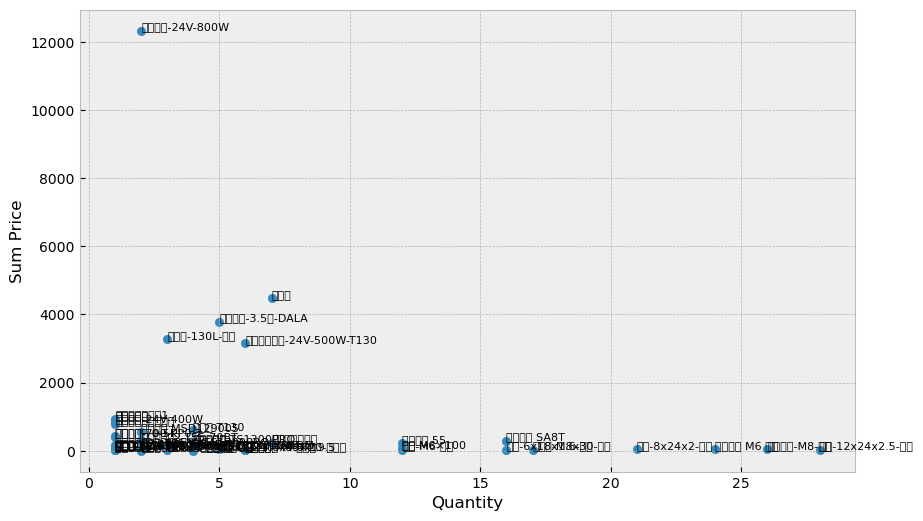

In [44]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(product['Quantity'], product['sum_price'])

# Add labels for each point
for i, label in enumerate(product['Unit Name']):
    plt.text(product['Quantity'][i], product['sum_price'][i], label, fontsize=8)

# Set labels for axes
plt.xlabel('Quantity')
plt.ylabel('Sum Price')

# Show the plot
plt.show()

Comment:

Which component costs the most sum of money?

In [16]:
product_sorted = product.sort_values(by='sum_price', ascending=False)

In [17]:
top_10 = product_sorted[['Unit Name', 'sum_price']].head(20)
top_10

,Unit Name,sum_price
46,驱动电机-24V-800W,12324.00
2,前车轮,4467.26
25,操控面板-3.5寸-DALA,3781.80
28,污水箱-130L-绿色,3271.29
12,吸水电机组件-24V-500W-T130,3155.46
16,左刷盘电机组件1,932.54
30,物联网模块,911.82
9,吸尘电机-24V-400W,828.93
8,后边刷推杆电机组件,773.97
44,隔音棉 T130,602.72


/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39537 (\N{CJK UNIFIED IDEOGRAPH-9A71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/teresashi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-5

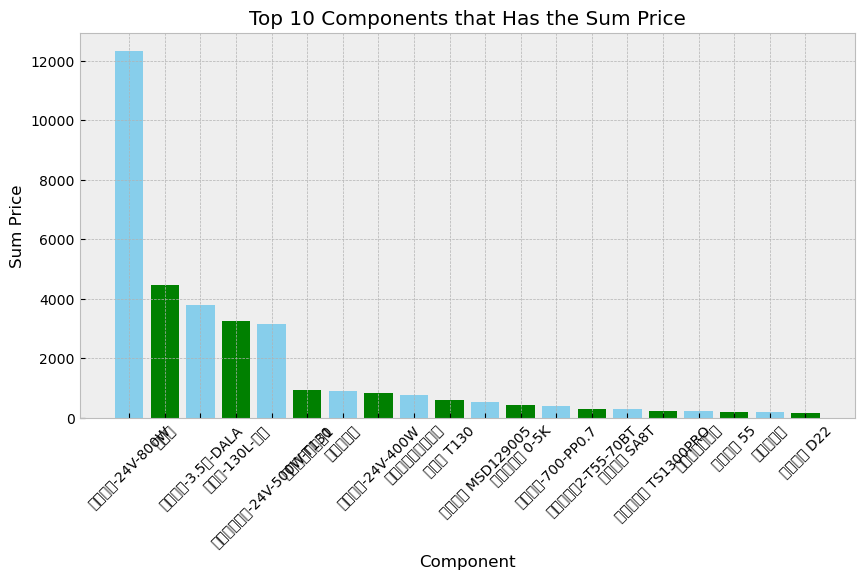

In [18]:
# Plotting the bar graph
plt.figure(figsize=(10, 5))
plt.bar(top_10['Unit Name'], top_10['sum_price'], color=('skyblue','green'))
plt.xlabel('Component')
plt.ylabel('Sum Price')
plt.title('Top 10 Components that Has the Sum Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Comment: from seeing the distributions of top 20 components that have the most sum cost, we can see that the top 5 components have the most sum price that are much more than the rest of replaced components.

List:
驱动电机-24V-800W	         $12324.00
前车轮	                      $4467.26
操控面板-3.5寸-DALA           $3781.80
污水箱-130L-绿色	             $3271.29
吸水电机组件-24V-500W-T130    $3155.46

Which component is more likely to be broken?

In [24]:
product_sorted = product.sort_values(by='Quantity', ascending=False)

In [25]:
top_10 = product_sorted[['Unit Name', 'Quantity']].head(40)

/var/folders/62/lm8xz6tj4nlg7dtrbwdxb7w40000gn/T/ipykernel_14549/964019693.py:8: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
/var/folders/62/lm8xz6tj4nlg7dtrbwdxb7w40000gn/T/ipykernel_14549/964019693.py:8: UserWarning: Glyph 22443 (\N{CJK UNIFIED IDEOGRAPH-57AB}) missing from current font.
  plt.tight_layout()
/var/folders/62/lm8xz6tj4nlg7dtrbwdxb7w40000gn/T/ipykernel_14549/964019693.py:8: UserWarning: Glyph 38208 (\N{CJK UNIFIED IDEOGRAPH-9540}) missing from current font.
  plt.tight_layout()
/var/folders/62/lm8xz6tj4nlg7dtrbwdxb7w40000gn/T/ipykernel_14549/964019693.py:8: UserWarning: Glyph 38156 (\N{CJK UNIFIED IDEOGRAPH-950C}) missing from current font.
  plt.tight_layout()
/var/folders/62/lm8xz6tj4nlg7dtrbwdxb7w40000gn/T/ipykernel_14549/964019693.py:8: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  plt.tight_layout()
/var/folders/62/lm8xz6tj4nlg7dtrbwdxb7w40000gn/T/ipykernel_14549/

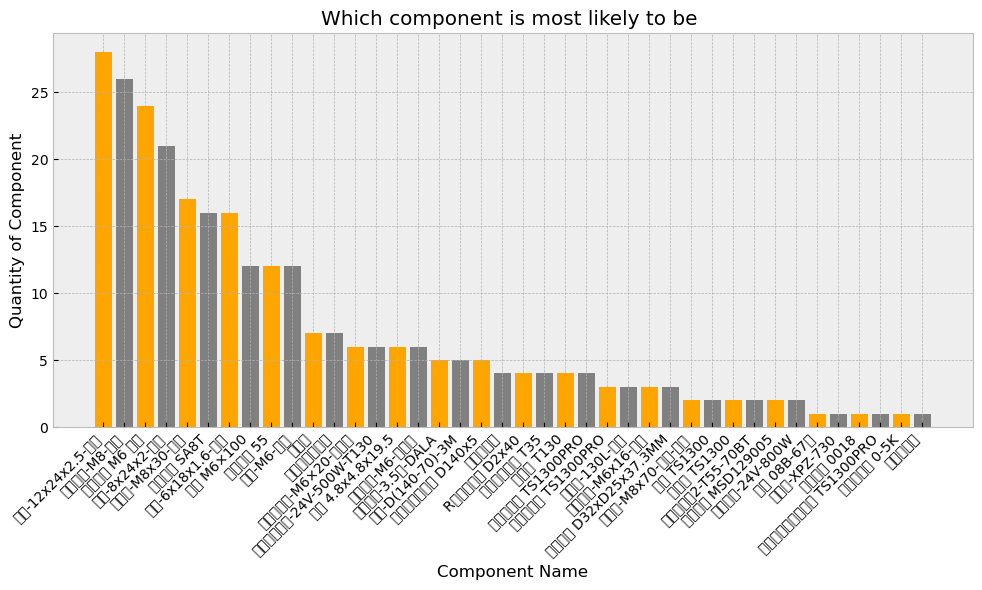

In [26]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10['Unit Name'], top_10['Quantity'], color=('orange','grey'))
plt.xlabel('Component Name')
plt.ylabel('Quantity of Component')
plt.title('Which component is most likely to be ')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

Comment: we can see that there is a distinct difference between the components that have been replaced more than 10 times where the unit might be more likely in break again in the future. 

In [31]:
print(product.loc[product['Quantity'] >= 10, ['Unit Name', 'Quantity']])

          Unit Name  Quantity
14     外六角-M8x30-镀锌        17
18  平垫-12x24x2.5-镀锌        28
19   平垫-6x18x1.6-镀锌        16
20     平垫-8x24x2-镀锌        21
22         弹垫-M6-镀锌        12
26          支撑套管 55        12
36       自锁螺母 M6 镀锌        24
38       自锁螺母-M8-镀锌        26
39        螺杆 M6×100        12
47        鱼眼轴承 SA8T        16


Does seasonality and the date have to do with broken components?

In [184]:
# Assuming df is your DataFrame and '日期' is the column containing datetime values
df['日期'] = pd.to_datetime(df['日期'])  # Convert to datetime if not already

# Extract date part
df['日期'] = df['日期'].dt.date

In [185]:
df['日期']

0      2023-11-07
1      2023-10-26
2      2023-11-07
3      2023-11-29
4      2023-11-22
          ...    
126    2023-10-18
127    2023-11-13
128    2023-10-26
129    2023-10-19
130    2023-09-22
Name: 日期, Length: 131, dtype: object

In [190]:
# Group by 'Code Name' column and perform aggregation
date = (df.groupby(df['日期'].ne(df['日期'].shift()).cumsum(), as_index=False)
           .agg({'日期': 'first', '耗材数量': 'sum'})
       )

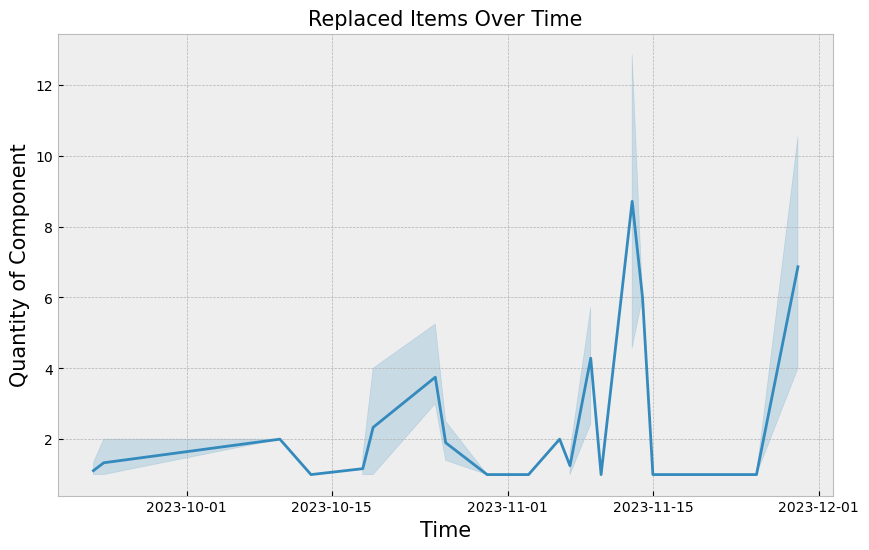

In [191]:
plt.figure(figsize=(10,6))
sns.lineplot(data=date,x="日期",y="耗材数量") #,hue="type"
plt.title("Replaced Items Over Time",fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Quantity of Component',fontsize=15)
plt.show()

In [ ]:
#It seems like 

In [14]:
# Assuming 'column_name' is the column you want to categorize
df['category'] = df['耗材名称'].astype(str)  # Convert to string if necessary
df['category'] = df['category'].apply(lambda x: 'Category_A' if 'match_value' in x else 'Category_B')
df['category']

0            操控面板-3.5寸-DALA
1                   边刷电机安装板
2           右边刷支架 TS1300PRO
3      吸水电机组件-24V-500W-T130
4                  弹垫-M6-镀锌
               ...         
126          黄色滚刷-700-PP0.7
127                     前车轮
128               轴套 TS1300
129     前轮隔套 D32xD25x37.3MM
130              方向轴 TS1300
Name: category, Length: 131, dtype: object

In [ ]:
# Now, use groupby and count to get the number of items in each category
category_counts = df.groupby('new_category').size().reset_index(name='count')

# Display the result
print(category_counts)

In [ ]:
# Create a copy of the DataFrame df
df2 = df.copy()

# Set the 'age' column as the index for df2
df2 = df2.set_index('age')

In [ ]:
#Sorting by 'year' in ascending order and 'wage' in descending order:
df.sort_values(by=['year', 'wage'], ascending=[True, False])
#Sorting by index:
df.sort_index()

In [229]:
# Example string
input_string = '苏州翡翠星辰1#TS1300'

# Split the string based on 'T'
parts = input_string.split('T', 1)

# Print the result
print(parts[1] if len(parts) > 1 else input_string)

SyntaxError: invalid syntax (3447714297.py, line 7)

In [230]:
for i in df['设备名称']:
    input_string = df['设备名称']

# Split the string based on 'TS'
parts = input_string.split('T', 1)

# Print the result
print("T" + parts[1] if len(parts) > 1 else input_string)

# Iterate through df['设备名称']
for i, row in df.设备名称()
    input_string == row['设备名称']
    parts = input_string.split('TS', 1)
    result = "TS" + parts[1] if len(parts) > 1 else input_string
    print(result)

SyntaxError: expected ':' (2539119430.py, line 10)

In [199]:
import pandas as pd
import re

In [200]:
# Define a regular expression pattern to match 'TS' followed by digits
pattern = re.compile(r'TS\d+')

# Apply the pattern to the '设备名称' column and extract the matched part
df['设备名称'] = df['设备名称'].apply(lambda x: pattern.search('TS').group() if pattern.search('TS') else x)

# Display the updated DataFrame
print( df['设备名称'])

0          南京深悦滨江T130
1      苏州翡翠星辰1#TS1300
2      苏州翡翠星辰1#TS1300
3          南京金地明悦T130
4          南京金地明悦T130
            ...      
126    金地自在城五七期TS1300
127       太仓阅峰庭TS1300
128       太仓阅峰庭TS1300
129       太仓阅峰庭TS1300
130       太仓阅峰庭TS1300
Name: 设备名称, Length: 131, dtype: object


In [209]:



# Example string
input_string = '苏州翡翠星辰1#TS1300'

# Split the string based on 'TS'
parts = input_string.split('TS', 1)

# Print the result
print("TS" + parts[1] if len(parts) > 1 else input_string)

TS1300


In [168]:
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Split the '设备名称' string based on 'TS'
    parts = row['设备名称'].split('T', 1)
    
    # Update the '设备名称' column with the part after 'TS' (if 'TS' is present)
    df.at[index, '设备名称'] = parts[1] if len(parts) > 1 else row['设备名称']

    
# Display the updated DataFrame
print(df)

                      日期       对应的报修编号                  耗材名称    设备名称  所属公司  \
0    2023-11-29 02:35:37  2.023113e+21        操控面板-3.5寸-DALA  SSS130  金地南京   
1    2023-11-29 01:52:39  2.023111e+21               边刷电机安装板    1300  金地南京   
2    2023-11-29 01:52:37  2.023111e+21       右边刷支架 TS1300PRO    1300  金地南京   
3    2023-11-29 01:44:48  2.023111e+21  吸水电机组件-24V-500W-T130  SSS130  金地南京   
4    2023-11-29 01:44:47  2.023111e+21              弹垫-M6-镀锌  SSS130  金地南京   
..                   ...           ...                   ...     ...   ...   
126  2023-09-22 03:23:42  2.023091e+21        黄色滚刷-700-PP0.7    1300  金地南京   
127  2023-09-22 03:20:15  2.023091e+21                   前车轮    1300  金地南京   
128  2023-09-22 03:20:14  2.023091e+21             轴套 TS1300    1300  金地南京   
129  2023-09-22 03:20:14  2.023091e+21   前轮隔套 D32xD25x37.3MM    1300  金地南京   
130  2023-09-22 03:20:13  2.023091e+21            方向轴 TS1300    1300  金地南京   

      所属片区        所属项目  更换原因  耗材数量      单价     总价  
0    南京一片区 

In [142]:
# Set a font that includes Chinese characters
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"

In [143]:
#list all the types of our data and take only the numerical ones:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [144]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,对应的报修编号,耗材数量,单价,总价
0,2.023113e+21,1,756.36,0.00
1,2.023111e+21,1,32.55,32.55
2,2.023111e+21,1,57.58,57.58
3,2.023111e+21,1,525.91,0.00
4,2.023111e+21,3,1.77,0.00


AttributeError: Rectangle.set() got an unexpected keyword argument 'fontname'

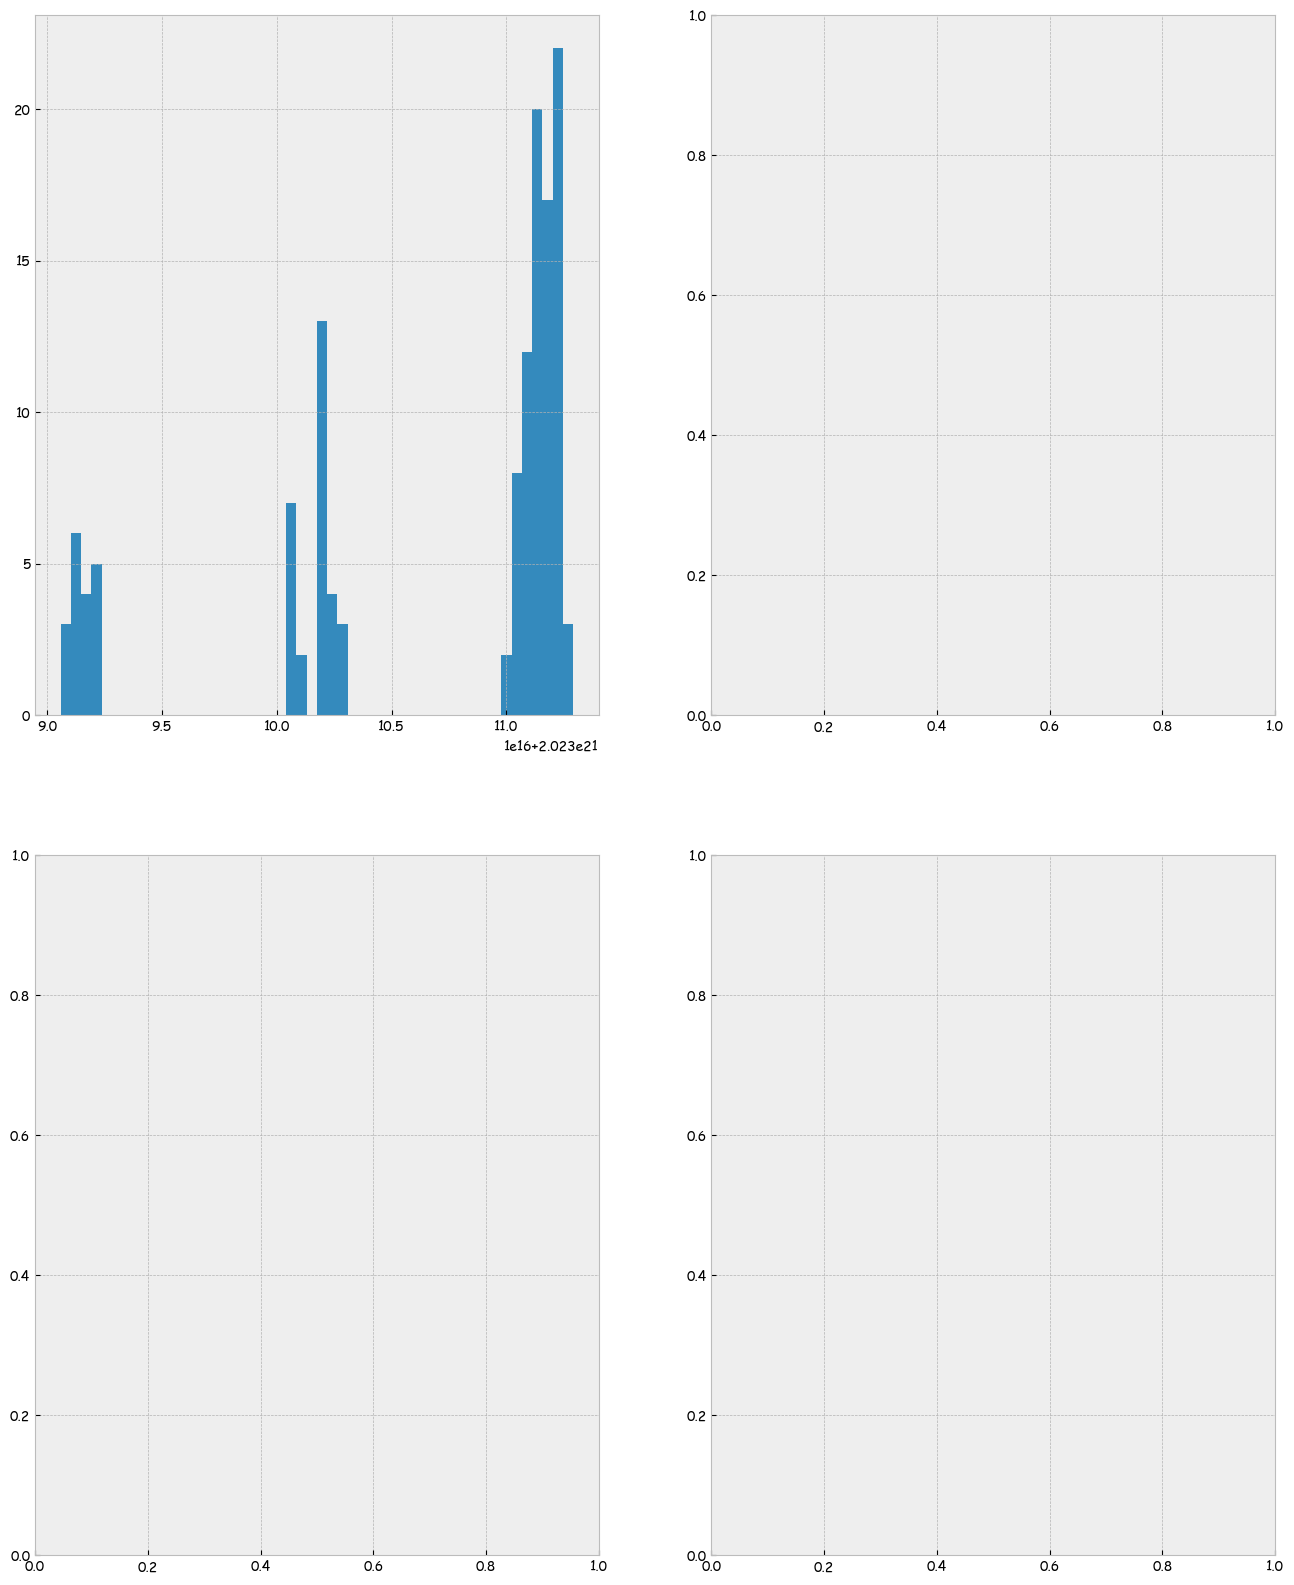

In [147]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, fontname="Arial", fontsize=12);

In [146]:
fig, ax = plt.plot(x,y) #some random variables
ax.set_ylabel("First variable", fontname="Arial", fontsize=12)

NameError: name 'x' is not defined

In [ ]:
fig = pd.DataFrame({
    '债券收益率':bond,
    '债券型基金收益率':bondFunds,
    '被动指数型基金收益率':indexFunds,
    '总收益率':ret})
fig.plot()

# Note the next lines
plt.legend(loc=0, prop=fontP)
plt.title('债券收益率', fontproperties=fontP)

plt.grid(True)
plt.axis('tight')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because

<Figure size 900x800 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because none of the following families were found: Ariel
findfont: Generic family 'sans-serif' not found because

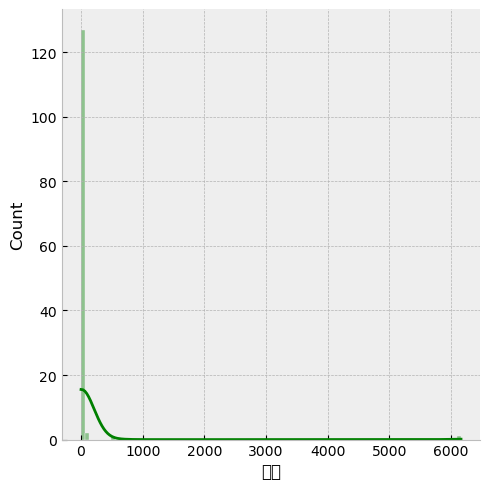

In [120]:
plt.figure(figsize=(9, 8))
sns.displot(df['总价'], color='g', bins=100, alpha=0.4, kde=True)
plt.show()